In [1]:
import pandas as pd

# import keyword analysis lib
%run Keyword_Analysis_Lib.ipynb

In [2]:
# read data
df = pd.read_csv("../data/processed_data.csv")
df

,subject,description,integration,objective,quality,refactoring,testing,categoryCount,subjDescription
0,wip better connection test,assign configure fake connections test class d...,0,1,0,0,1,2,wip better connection testassign configure fa...
1,ansible standardcontainer,patchset move role task main yaml file use con...,0,1,1,0,0,2,ansible standardcontainerpatchset move role ...
2,switch testtools remove pep warn unit test dba...,bug blueprint changeid iffcdbcfbeecdeacebdb,1,1,0,0,1,3,switch testtools remove pep warn unit test dba...
3,minor wsgi py,minor code file suggest termie henry review c...,0,1,0,1,0,2,minor wsgi pyminor code file suggest termie ...
4,minor wsgi py,minor wsgi py minor code file suggest termie...,0,1,0,1,0,2,minor wsgi pyminor wsgi py minor code file ...
...,...,...,...,...,...,...,...,...,...
1701,xenapi spawn prep code share,xenapi spawn code share fix bug relate incons...,0,1,1,0,0,2,xenapi spawn prep code sharexenapi spawn cod...
1702,xenapi volumeops attach,attach code readable time check vm run hotplu...,0,1,1,0,0,2,xenapi volumeops attach attach code readable ...
1703,xenapi rawtgzimage common,review request rawtgzimage class move common t...,0,1,1,0,0,2,xenapi rawtgzimage commonreview request rawtg...
1704,xenapi updateglanceimage common,review recommend updateglanceimage common libr...,0,1,0,1,0,2,xenapi updateglanceimage commonreview recomme...


In [3]:
# apply additional preprecessing

# remove changeid which is present in every description by default
df.description = df.description.str.replace("changeid ","")
df.subjDescription = df.subjDescription.str.replace("changeid ","")

In [4]:
# determine word counts for specified column
col = "subjDescription"
docs = list(df[col])

categories = ["refactoring","integration","quality","testing","objective"]
word_count = {} # total count of words over all docs
word_count_category = {c:{} for c in categories} # total count of words in docs of category
doc_count = {} # number of docs a word occurs within

for doc_index in range(len(df)):
    doc = docs[doc_index]
    cat_dict = dict(df.iloc[doc_index][categories])
    assigned_categories = [cat for cat in cat_dict if cat_dict[cat]]
    
    for word in doc.split():
        # general word count
        if word not in word_count:
            word_count[word] = 0
        word_count[word] += 1 
            
        # category specific count
        for category in assigned_categories:
            if word not in word_count_category[category]:
                word_count_category[category][word] = 0
            word_count_category[category][word] += 1
        
    # general doc count
    for word in set(doc.split()):
        if word not in doc_count:
            doc_count[word] = 0
        doc_count[word] += 1

In [5]:
# display most frequent words sorted in descending order
print("# Words:", len(word_count))
dict(sorted(word_count.items(), key=lambda item: item[1], reverse=True))

# Words: 8500


{'test': 2211,
 'function': 743,
 'code': 674,
 'add': 638,
 'api': 575,
 'change': 536,
 'class': 499,
 'use': 478,
 'patch': 444,
 'remove': 342,
 'create': 341,
 'ing': 341,
 'file': 319,
 'new': 311,
 'case': 308,
 'unit': 305,
 'method': 297,
 'py': 291,
 'fix': 285,
 'get': 283,
 'service': 272,
 'base': 261,
 'check': 249,
 'need': 247,
 'update': 244,
 'image': 239,
 'pass': 233,
 'driver': 221,
 'call': 215,
 'methods': 210,
 'volume': 192,
 'run': 192,
 'instance': 191,
 'common': 190,
 'set': 188,
 'blueprint': 186,
 'object': 184,
 'handle': 181,
 'bug': 180,
 'commit': 179,
 'module': 179,
 'move': 176,
 'implement': 176,
 'support': 175,
 'data': 175,
 'instead': 174,
 'db': 172,
 's': 169,
 'functional': 164,
 'config': 164,
 'type': 160,
 'network': 153,
 'ed': 149,
 'resource': 149,
 'allow': 145,
 'id': 142,
 'closesbug': 141,
 'delete': 139,
 'logic': 129,
 'list': 127,
 'utils': 124,
 'work': 124,
 'exist': 123,
 'relate': 122,
 'process': 122,
 'client': 121,
 'hos

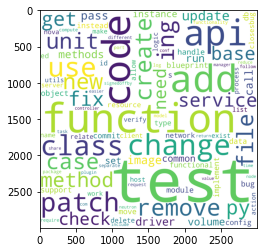

In [6]:
generate_wordcloud(word_count)

In [7]:
# calculate class-based TF-IDF scores and display 10 most relevant word per category without minimum threshold for word occurance
create_keyword_ctfidf(word_count_category, word_count, 10, 0)

,refactoring,integration,quality,testing,objective
0,function: 0.127,api: 0.103,test: 0.089,test: 0.184,test: 0.102
1,conf: 0.059,test: 0.056,code: 0.054,add: 0.048,add: 0.043
2,use: 0.056,change: 0.045,function: 0.047,unit: 0.043,code: 0.043
3,image: 0.054,patch: 0.041,change: 0.039,class: 0.041,function: 0.04
4,ing: 0.046,db: 0.038,class: 0.039,case: 0.04,change: 0.038
5,utils: 0.044,add: 0.036,add: 0.037,change: 0.039,class: 0.036
6,code: 0.042,pass: 0.036,use: 0.033,code: 0.037,api: 0.035
7,driver: 0.04,class: 0.036,patch: 0.028,patch: 0.032,patch: 0.033
8,test: 0.04,service: 0.033,create: 0.026,use: 0.031,use: 0.033
9,get: 0.037,code: 0.031,file: 0.025,file: 0.031,create: 0.027


In [8]:
# calculate class-based TF-IDF scores and display 10 most relevant word per category only considering words which occur at least 30 times overall
create_keyword_ctfidf(word_count_category, word_count, 10, 30)

,refactoring,integration,quality,testing,objective
0,function: 0.127,api: 0.103,test: 0.089,test: 0.184,test: 0.102
1,conf: 0.059,test: 0.056,code: 0.054,add: 0.048,add: 0.043
2,use: 0.056,change: 0.045,function: 0.047,unit: 0.043,code: 0.043
3,image: 0.054,patch: 0.041,change: 0.039,class: 0.041,function: 0.04
4,ing: 0.046,db: 0.038,class: 0.039,case: 0.04,change: 0.038
5,code: 0.042,add: 0.036,add: 0.037,change: 0.039,class: 0.036
6,test: 0.04,pass: 0.036,use: 0.033,code: 0.037,api: 0.035
7,add: 0.033,class: 0.036,patch: 0.028,patch: 0.032,patch: 0.033
8,,service: 0.033,create: 0.026,use: 0.031,use: 0.033
9,,code: 0.031,file: 0.025,file: 0.031,create: 0.027
